In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

def generate_asthma(n = 10000, effect_baseline = 0.0, prob_asthma = 0.2, effect_asthma = 0.3, effect_age = 0.7, thresh_treatment = 0.3, effect_treatment = 0.8, verbose = True):
    
    asthma = np.random.binomial(size = n, n = 1, p = prob_asthma)
    
    age = np.random.uniform(size = (n))
    
    risk = effect_baseline + effect_asthma * asthma + effect_age * age
    
    treatment = 1.0 * (risk >= thresh_treatment)
    
    risk -= effect_treatment * treatment
    
    risk[risk < 0] = 0
    risk[risk > 1] = 1
    
    died = np.random.binomial(size = n, n = 1, p = risk)
    
    if verbose:
    
        print("Mean Risk condition on Asthma")
        print(np.mean(risk[asthma == 0]), np.mean(risk[asthma == 1]))
        
        
    return asthma, age, risk, treatment, died

def eval_model(X_train, y_train, X_test, y_test):
    
    model = DecisionTreeClassifier(min_samples_leaf = 20, min_impurity_decrease = 0.001)
    
    model.fit(X_train, y_train)
    
    print("Training Accuracy")
    print(accuracy_score(y_train, model.predict(X_train)))
    print("Test Accuracy")
    print(accuracy_score(y_test, model.predict(X_test)))
    
    plt.figure()
    plot_tree(model, filled = True)
    plt.show()
    plt.close()
    
    print("Affect of giving a patient asthma")
    r = []
    for i in range(X_test.shape[0]):
        x = np.expand_dims(X_test[i, :], 0)
        if x[0, 0] == 0:
            x_copy = np.copy(x)
            x_copy[0, 0] = 1
            r.append(model.predict_proba(x_copy)[0, 1] - model.predict_proba(x)[0, 1])
    r = np.array(r)
        
    plt.figure()
    plt.hist(r)
    plt.show()
    plt.close()
    
    print("Affect of making a patient older")
    r = []
    for i in range(X_test.shape[0]):
        x = np.expand_dims(X_test[i, :], 0)
        x_copy = np.copy(x)
        x_copy[0, 1] += 0.1
        r.append(model.predict_proba(x_copy)[0, 1] - model.predict_proba(x)[0, 1])
    r = np.array(r)
        
    plt.figure()
    plt.hist(r)
    plt.show()
    plt.close()
    



Treatment Effect:  0.0
Mean Risk condition on Asthma
0.3497815113615475 0.6492262577402144
Training Accuracy
0.7052
Test Accuracy
0.7028


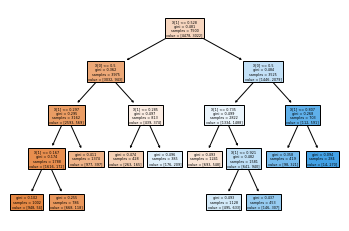

Affect of giving a patient asthma


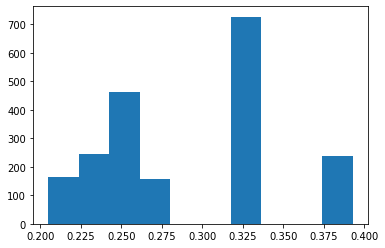

Affect of making a patient older


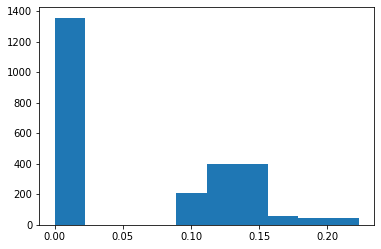


Treatment Effect:  0.4
Mean Risk condition on Asthma
0.12778978766416546 0.2545127648962197
Training Accuracy
0.8594666666666667
Test Accuracy
0.8428


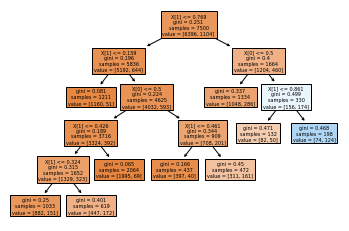

Affect of giving a patient asthma


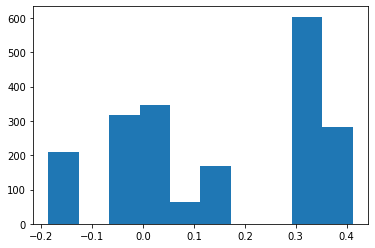

Affect of making a patient older


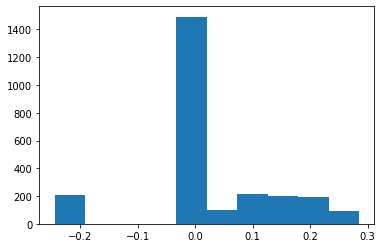


Treatment Effect:  0.8
Mean Risk condition on Asthma
0.06344335020676876 0.02889801519508572
Training Accuracy
0.9417333333333333
Test Accuracy
0.9392


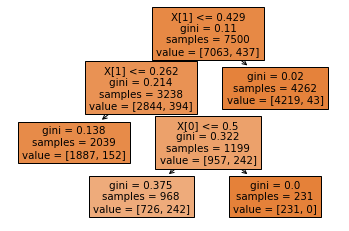

Affect of giving a patient asthma


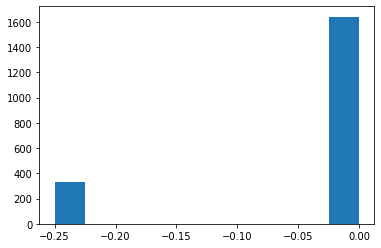

Affect of making a patient older


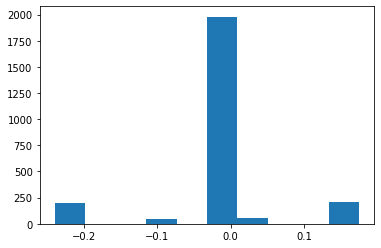

In [2]:

for effect_treatment in [0.0, 0.4, 0.8]:
    
    print("\nTreatment Effect: ", effect_treatment)

    asthma, age, risk, treatment, died = generate_asthma(effect_treatment = effect_treatment)

    X = np.transpose(np.vstack([asthma, age]))
    y = died

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    eval_model(X_train, y_train, X_test, y_test)
